In [36]:
!pip install dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
# Read the CSV file from Google Drive
data = pd.read_csv('/content/drive/MyDrive/Colab_files/nobel_latest.csv')

# Print the first rows
print(data.head())


   Year  Laureate_Id       Firstname     Lastname    Category Gender  \
0  1901            1  Wilhelm Conrad      Röntgen     physics   male   
1  1901          293            Emil  von Behring    medicine   male   
2  1901          462           Henry       Dunant       peace   male   
3  1901          463        Frédéric        Passy       peace   male   
4  1901          569           Sully    Prudhomme  literature   male   

   Prize_Share                                         Motivation  Birth_Date  \
0            1  "in recognition of the extraordinary services ...  1845-03-27   
1            1  "for his work on serum therapy especially its ...  1854-03-15   
2            2  "for his humanitarian efforts to help wounded ...  1828-05-08   
3            2  "for his lifelong work for international peace...  1822-05-20   
4            1  "in special recognition of his poetic composit...  1839-03-16   

           Birth_Country              Birth_City Birth_Country_Code  \
0  Prussi

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  989 non-null    int64 
 1   Laureate_Id           989 non-null    int64 
 2   Firstname             989 non-null    object
 3   Lastname              957 non-null    object
 4   Category              989 non-null    object
 5   Gender                989 non-null    object
 6   Prize_Share           989 non-null    int64 
 7   Motivation            989 non-null    object
 8   Birth_Date            989 non-null    object
 9   Birth_Country         958 non-null    object
 10  Birth_City            956 non-null    object
 11  Birth_Country_Code    958 non-null    object
 12  Death_Date            989 non-null    object
 13  Death_Country         646 non-null    object
 14  Death_City            640 non-null    object
 15  Death_Country_Code    646 non-null    ob

In [41]:
data.describe()

,Year,Laureate_Id,Prize_Share
count,989.000000,989.000000,989.000000
mean,1973.172902,503.316481,2.024267
std,34.318841,294.666723,0.944523
min,1901.000000,1.000000,1.000000
25%,1949.000000,248.000000,1.000000
50%,1979.000000,495.000000,2.000000
75%,2002.000000,756.000000,3.000000
max,2022.000000,1023.000000,4.000000


In [42]:
# Select non-numeric (object) columns
non_numeric_columns = data.select_dtypes(include='object')

# Display the selected non-numeric columns
print(non_numeric_columns)


          Firstname     Lastname    Category  Gender  \
0    Wilhelm Conrad      Röntgen     physics    male   
1              Emil  von Behring    medicine    male   
2             Henry       Dunant       peace    male   
3          Frédéric        Passy       peace    male   
4             Sully    Prudhomme  literature    male   
..              ...          ...         ...     ...   
984          Svante        Pääbo    medicine    male   
985           Barry    Sharpless   chemistry    male   
986         Douglas      Diamond   economics    male   
987         Carolyn     Bertozzi   chemistry  female   
988          Philip       Dybvig   economics    male   

                                            Motivation  Birth_Date  \
0    "in recognition of the extraordinary services ...  1845-03-27   
1    "for his work on serum therapy especially its ...  1854-03-15   
2    "for his humanitarian efforts to help wounded ...  1828-05-08   
3    "for his lifelong work for international p

In [43]:
# Display the number of (possibly shared) Nobel Prizes handed out between 1901 and 2016
display(len(data))

# Display the number of prizes won by male and female recipients.
display(data["Gender"].value_counts())

# Display the number of prizes won by the top 10 nationalities.
data["Birth_Country"].value_counts().head(n=10)

989

male      898
female     61
org        30
Name: Gender, dtype: int64

USA                289
United Kingdom      90
Germany             67
France              56
Sweden              30
Japan               28
Canada              21
Switzerland         19
the Netherlands     19
Russia              18
Name: Birth_Country, dtype: int64

USA dominance

In [44]:
# Calculating the proportion of USA born winners per decade
data['usa_born_winner'] = data["Birth_Country"]=="USA"
data['decade'] = (np.floor(data["Year"]/10)*10).astype(int)

prop_usa_winners = data.groupby('decade', as_index=False)['usa_born_winner'].mean()

# Display the proportions of USA born winners per decade
display(prop_usa_winners)

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


USA dominance, visualized

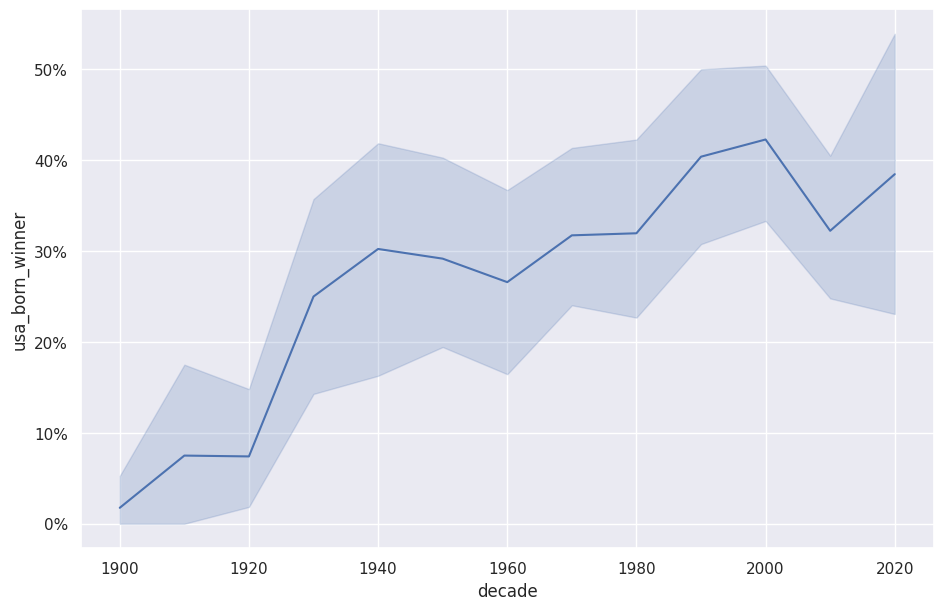

In [45]:
# Setting the plotting theme
sns.set()
# and setting the size of all plots.
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners
ax = sns.lineplot(data= data, x="decade", y="usa_born_winner")

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))


#Interactive Map for Winners by Country

In [46]:
# Aggregate the counts of winners per country
winners_by_country = data['Birth_Country'].value_counts().reset_index()
winners_by_country.columns = ['Country', 'Count']
print(winners_by_country)

                                  Country  Count
0                                     USA    289
1                          United Kingdom     90
2                                 Germany     67
3                                  France     56
4                                  Sweden     30
..                                    ...    ...
121         Austria-Hungary (now Ukraine)      1
122                Hungary (now Slovakia)      1
123  Austrian Empire (now Czech Republic)      1
124           Ottoman Empire (now Turkey)      1
125                               Lebanon      1

[126 rows x 2 columns]


In [47]:
import plotly.express as px

# Create an interactive map using Plotly Express
fig = px.choropleth(winners_by_country,
                    locations='Country',
                    locationmode='country names',
                    color='Count',
                    hover_name='Country',
                    projection='natural earth',
                    color_continuous_scale='Spectral')  # Choose a different color scale

# Customize the map layout
fig.update_layout(title='Nobel Prize Winners by Country')

# Show the interactive map
fig.show()


In [48]:
# Aggregate the counts of prizes by category
# Aggregate the counts of prizes by country and category
prizes_by_country_category = data.groupby(['Birth_Country', 'Category']).size().reset_index(name='Count')
prizes_by_country_category


,Birth_Country,Category,Count
0,Argentina,medicine,2
1,Argentina,peace,2
2,Australia,chemistry,1
3,Australia,medicine,7
4,Australia,physics,2
...,...,...,...
264,the Netherlands,chemistry,4
265,the Netherlands,economics,3
266,the Netherlands,medicine,2
267,the Netherlands,peace,1


Interactive graph for the average age of winners each year

In [49]:
# Convert the birth date to datetime format, handling errors
data['Birth_Date'] = pd.to_datetime(data['Birth_Date'], errors='coerce')

# Drop rows with NaN values in the 'Birth_Date' column
data = data.dropna(subset=['Birth_Date'])

# Calculate the age of winners when they won the prize
data['Age'] = data['Year'] - data['Birth_Date'].dt.year
print(data.head())
print(max(data['Age'] ))

# Calculate the average age of winners per year
average_age = data.groupby('Year')['Age'].mean().reset_index()
print(average_age.head())

# Create an interactive line plot using Plotly Express
fig = px.line(average_age, x='Year', y='Age', title='Average Age of Nobel Prize Winners over the Years')

# Add labels and formatting to the plot
fig.update_layout(
        xaxis_title='Year',
        yaxis_title='Average Age',
        plot_bgcolor='white',
        hovermode='x',
    )

# Display the interactive graph
fig.show()


<ipython-input-49-5b174f3766b6>:2: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

<ipython-input-49-5b174f3766b6>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



   Year  Laureate_Id       Firstname     Lastname    Category Gender  \
0  1901            1  Wilhelm Conrad      Röntgen     physics   male   
1  1901          293            Emil  von Behring    medicine   male   
2  1901          462           Henry       Dunant       peace   male   
3  1901          463        Frédéric        Passy       peace   male   
4  1901          569           Sully    Prudhomme  literature   male   

   Prize_Share                                         Motivation Birth_Date  \
0            1  "in recognition of the extraordinary services ... 1845-03-27   
1            1  "for his work on serum therapy especially its ... 1854-03-15   
2            2  "for his humanitarian efforts to help wounded ... 1828-05-08   
3            2  "for his lifelong work for international peace... 1822-05-20   
4            1  "in special recognition of his poetic composit... 1839-03-16   

           Birth_Country  ...  Death_Date Death_Country Death_City  \
0  Prussia (now 

Gender of a typical Nobel Prize winner?

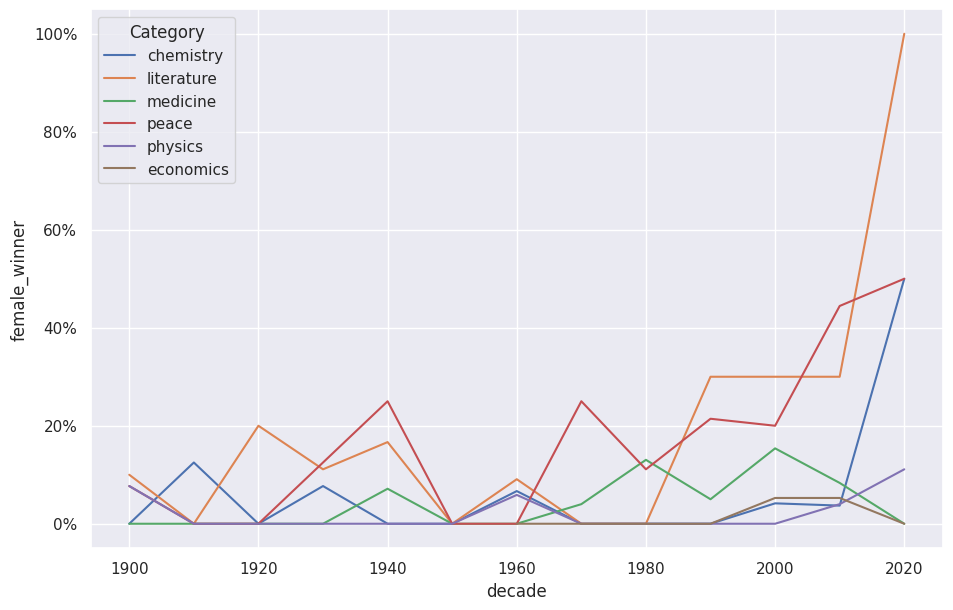

In [50]:
# Calculating the proportion of female laureates per decade
data['female_winner'] = data["Gender"]=="female"
prop_female_winners = data.groupby(["decade", "Category"], as_index=False)["female_winner"].mean()

# Setting the plotting theme
sns.set()
plt.rcParams['figure.figsize'] = [11, 7]
ax = sns.lineplot(data= prop_female_winners, x="decade", y="female_winner", hue="Category")

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))


Interactive graph for the female - male ratio

In [51]:
# Calculate the count of females and males per year
gender_count = data.groupby(['Year', 'Gender'])['Laureate_Id'].count().unstack().fillna(0)

# Calculate the ratio of females to males per year
gender_ratio = gender_count['female'] / gender_count['male']

# Create an interactive line plot using Plotly Express
fig = px.line(x=gender_ratio.index, y=gender_ratio.values, title='Ratio of Female to Male Nobel Prize Winners over the Years')

# Add labels and formatting to the plot
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Female-to-Male Ratio',
    plot_bgcolor='white',
    hovermode='x',
)

# Display the interactive graph
fig.show()


 The first woman to win the Nobel Prize

In [52]:
# Picking out the first woman to win a Nobel Prize
data[data["Gender"]=="female"].nsmallest(1,"Year")

,Year,Laureate_Id,Firstname,Lastname,Category,Gender,Prize_Share,Motivation,Birth_Date,Birth_Country,...,Death_Country,Death_City,Death_Country_Code,Organization_Name,Organization_City,Organization_Country,usa_born_winner,decade,Age,female_winner
16,1903,6,Marie,Curie,physics,female,4,"""in recognition of the extraordinary services ...",1867-11-07,Russian Empire (now Poland),...,France,Sallanches,FR,NaN,NaN,NaN,False,1900,36,True


Repeat laureates

In [53]:
# Selecting the laureates that have received 2 or more prizes.
data['full_name'] = data['Firstname']+ data['Lastname']
data.groupby("full_name").filter(lambda x: len(x) >= 2)

,Year,Laureate_Id,Firstname,Lastname,Category,Gender,Prize_Share,Motivation,Birth_Date,Birth_Country,...,Death_City,Death_Country_Code,Organization_Name,Organization_City,Organization_Country,usa_born_winner,decade,Age,female_winner,full_name
16,1903,6,Marie,Curie,physics,female,4,"""in recognition of the extraordinary services ...",1867-11-07,Russian Empire (now Poland),...,Sallanches,FR,NaN,NaN,NaN,False,1900,36,True,MarieCurie
64,1911,6,Marie,Curie,chemistry,female,1,"""in recognition of her services to the advance...",1867-11-07,Russian Empire (now Poland),...,Sallanches,FR,Sorbonne University,Paris,France,False,1910,44,True,MarieCurie
281,1954,217,Linus,Pauling,chemistry,male,1,"""for his research into the nature of the chemi...",1901-02-28,USA,...,Big Sur CA,US,California Institute of Technology (Caltech),Pasadena CA,USA,True,1950,53,False,LinusPauling
296,1956,66,John,Bardeen,physics,male,3,"""for their researches on semiconductors and th...",1908-05-23,USA,...,Boston MA,US,University of Illinois,Urbana IL,USA,True,1950,48,False,JohnBardeen
306,1958,222,Frederick,Sanger,chemistry,male,1,"""for his work on the structure of proteins esp...",1918-08-13,United Kingdom,...,Cambridge,GB,University of Cambridge,Cambridge,United Kingdom,False,1950,40,False,FrederickSanger
337,1962,217,Linus,Pauling,peace,male,1,"""for his fight against the nuclear arms race b...",1901-02-28,USA,...,Big Sur CA,US,California Institute of Technology (Caltech),Pasadena CA,USA,True,1960,61,False,LinusPauling
422,1972,66,John,Bardeen,physics,male,3,"""for their jointly developed theory of superco...",1908-05-23,USA,...,Boston MA,US,University of Illinois,Urbana IL,USA,True,1970,64,False,JohnBardeen
505,1980,222,Frederick,Sanger,chemistry,male,4,"""for their contributions concerning the determ...",1918-08-13,United Kingdom,...,Cambridge,GB,MRC Laboratory of Molecular Biology,Cambridge,United Kingdom,False,1980,62,False,FrederickSanger
725,2001,743,Barry,Sharpless,chemistry,male,2,"""for his work on chirally catalysed oxidation ...",1941-04-28,USA,...,NaN,NaN,The Scripps Research Institute,La Jolla CA,USA,True,2000,60,False,BarrySharpless
985,2022,743,Barry,Sharpless,chemistry,male,3,"""for the development of click chemistry and bi...",1941-04-28,USA,...,NaN,NaN,Scripps Research,La Jolla CA,USA,True,2020,81,False,BarrySharpless
